# **Dünya Mutluluk Endeksi Verilerinin Görselleştirilmesi ve Yorumlanması**

In [28]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
data1 = pd.read_csv('world-happiness-report-2021.csv')
data2 = pd.read_csv('world-happiness-report.csv')

# **DATA 1 ANALİZ**

In [30]:
data1.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [31]:
data1.shape

(149, 20)

In [32]:
data1.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [33]:
data1.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


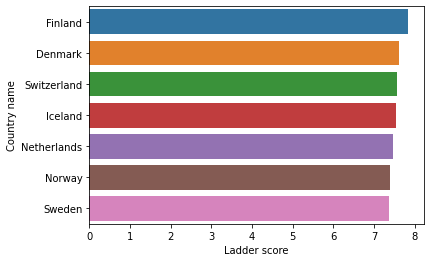

In [34]:
en_mutlu_ulkeler=data1.head(7)
sns.barplot(data=en_mutlu_ulkeler,y='Country name',x='Ladder score')


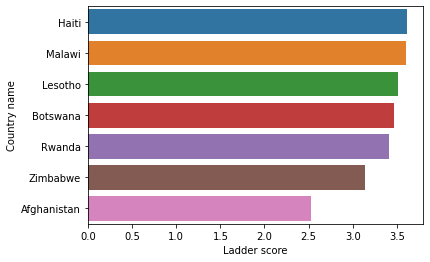

In [35]:
en_mutsuz_ulkeler = data1.tail(7)
sns.barplot(data=en_mutsuz_ulkeler,y='Country name',x='Ladder score')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d5288cfd0>,
      dtype=object)

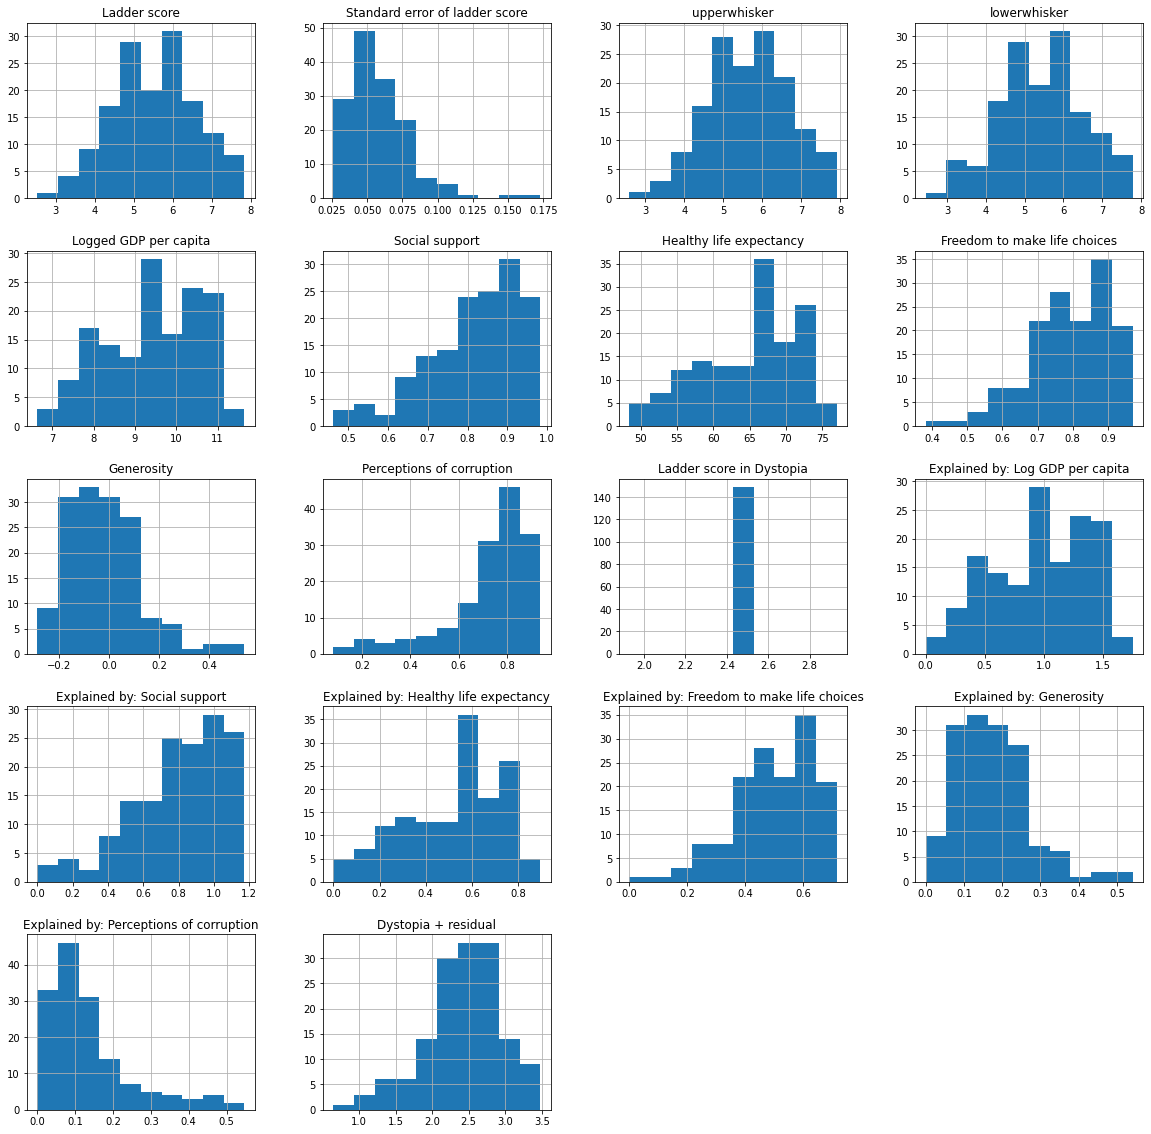

In [36]:
data1.hist(figsize=(20,20))

**Ülkeleri Bölgelere Göre Sınıflandırma**

In [37]:
bolge = data1.groupby('Regional indicator').agg({'Country name': 'count'})
bolge

,Country name
Regional indicator,
Central and Eastern Europe,17
Commonwealth of Independent States,12
East Asia,6
Latin America and Caribbean,20
Middle East and North Africa,17
North America and ANZ,4
South Asia,7
Southeast Asia,9
Sub-Saharan Africa,36


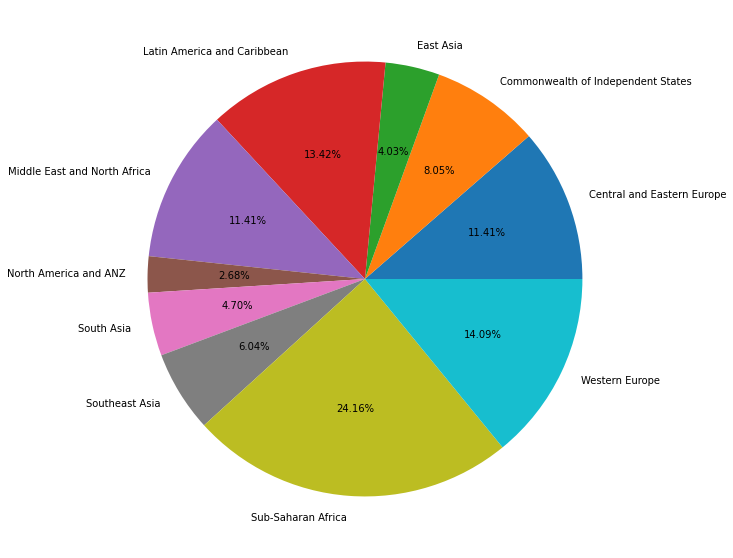

In [38]:
bolge.plot.pie(y='Country name', autopct="%.2f%%", legend=False, figsize=(10,10), ylabel='')

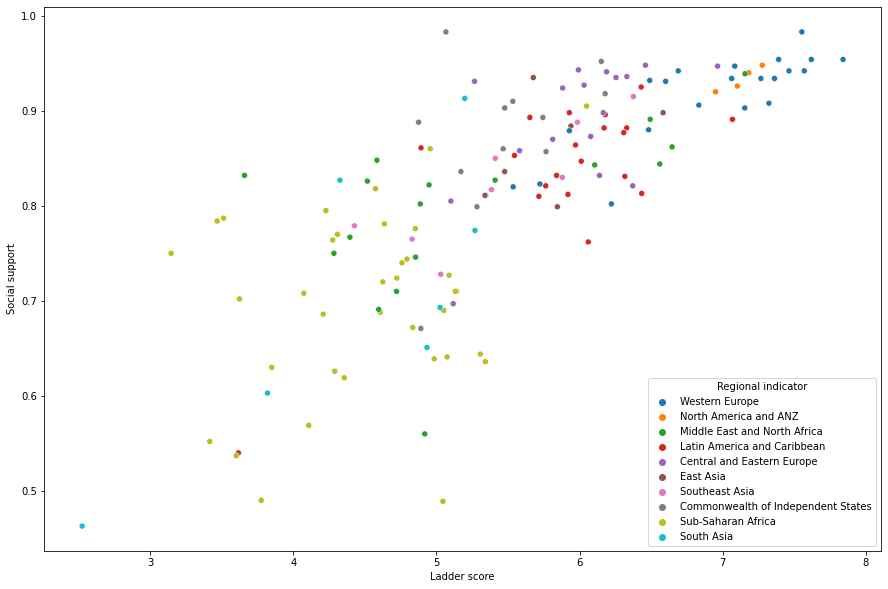

In [39]:
fig = plt.figure(figsize=(15,10)) 
sns.scatterplot(x='Ladder score', y='Social support', hue='Regional indicator', data=data1)

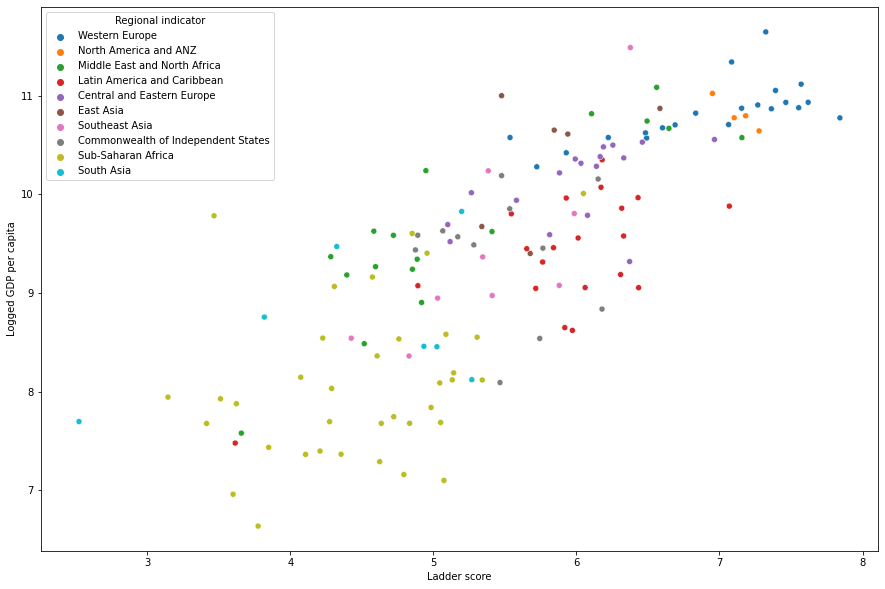

In [40]:
fig = plt.subplots(figsize=(15,10))
sns.scatterplot(x='Ladder score', y='Logged GDP per capita', hue='Regional indicator', data=data1)

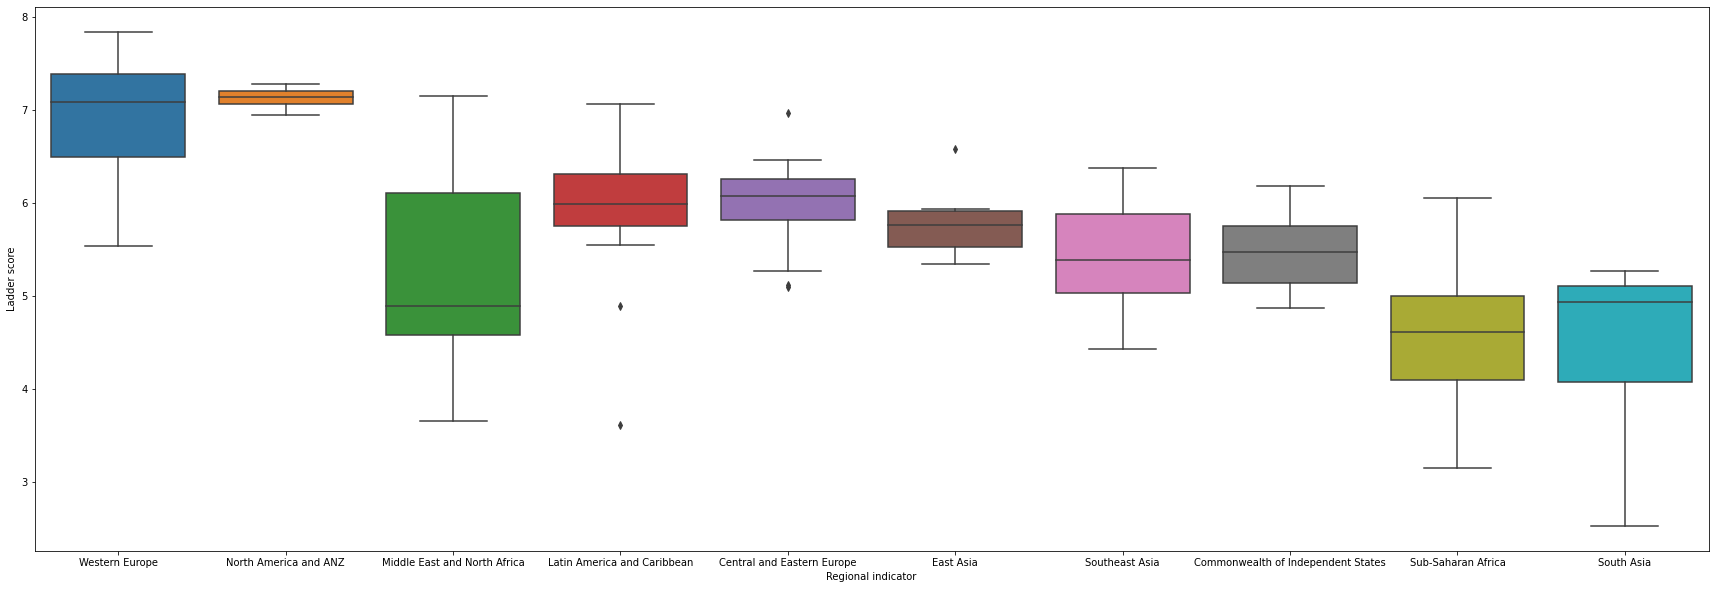

In [41]:
fig = plt.figure(figsize=(30,10))
sns.boxplot(x='Regional indicator',y='Ladder score',data=data1)

In [42]:
data1['Ladder score'].describe()

count    149.000000
mean       5.532839
std        1.073924
min        2.523000
25%        4.852000
50%        5.534000
75%        6.255000
max        7.842000
Name: Ladder score, dtype: float64

In [43]:
ort_25 = data1['Ladder score'].quantile(.25)
ort_75 = data1['Ladder score'].quantile(.75)
mean = data1['Ladder score'].mean()

In [44]:
unhappiest = data1[data1['Ladder score'] < ort_25]
middle = data1[(data1['Ladder score'] > ort_25) & (data1['Ladder score'] < ort_75)]
happiest = data1[data1['Ladder score'] > ort_75]

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

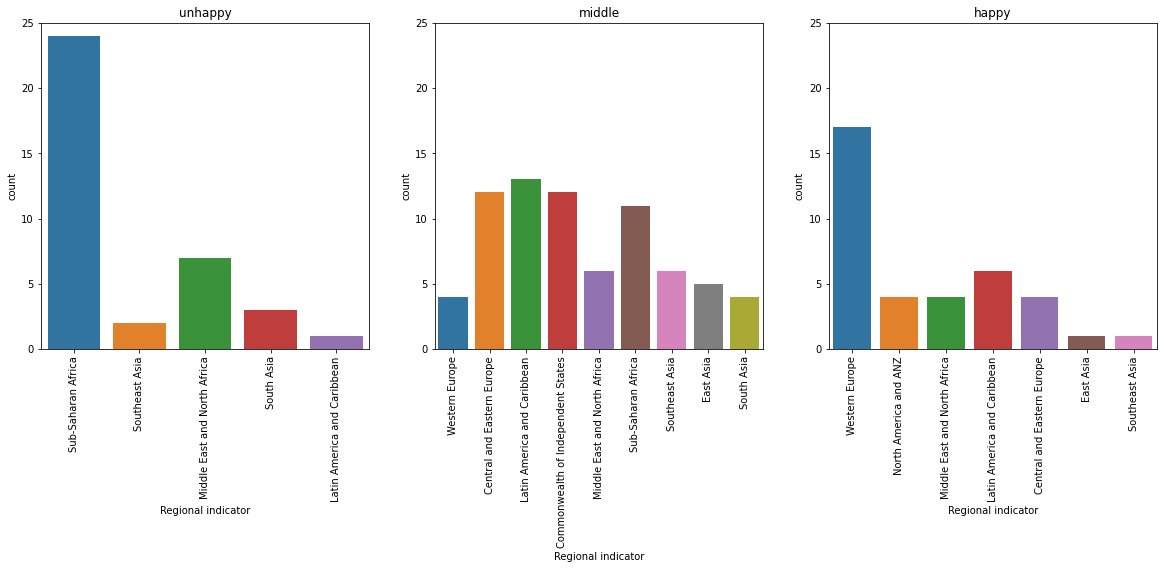

In [45]:
fig = plt.figure(figsize=(20,6))

ax = plt.subplot(1, 3, 1).set(title ='unhappy',ylim = [0, 25])
sns.countplot(x='Regional indicator', data=unhappiest)
plt.xticks(rotation=90)

ax = plt.subplot(1, 3, 2).set(title='middle',ylim = [0, 25])
sns.countplot(x='Regional indicator', data=middle)
plt.xticks(rotation=90)

ax = plt.subplot(1, 3, 3).set(title='happy',ylim = [0, 25])
sns.countplot(x='Regional indicator', data=happiest)
plt.xticks(rotation=90)

# **DATA 2 ANALİZ**

In [46]:
data2.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [47]:
data2.shape

(1949, 11)

In [48]:
Turkey = data2[data2['Country name']=='Turkey']
Turkey

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1753,Turkey,2005,4.719,9.809,0.820,62.60,0.623,NaN,0.877,0.557,NaN
1754,Turkey,2007,5.623,9.903,0.792,63.32,0.459,-0.178,0.800,0.651,0.395
1755,Turkey,2008,5.118,9.899,0.645,63.68,0.415,-0.189,0.785,0.614,0.345
1756,Turkey,2009,5.213,9.838,0.755,64.04,0.456,-0.227,0.853,0.598,0.316
1757,Turkey,2010,5.490,9.906,0.795,64.40,0.515,-0.187,0.811,0.652,0.327
1758,Turkey,2011,5.272,9.996,0.692,64.64,0.446,-0.242,0.649,0.621,0.380
1759,Turkey,2012,5.309,10.026,0.739,64.88,0.471,-0.216,0.702,0.645,0.335
1760,Turkey,2013,4.888,10.091,0.795,65.12,0.541,-0.229,0.698,0.635,0.392
1761,Turkey,2014,5.580,10.124,0.863,65.36,0.649,-0.024,0.764,0.483,0.377
1762,Turkey,2015,5.514,10.166,0.851,65.60,0.653,-0.016,0.806,0.460,0.382


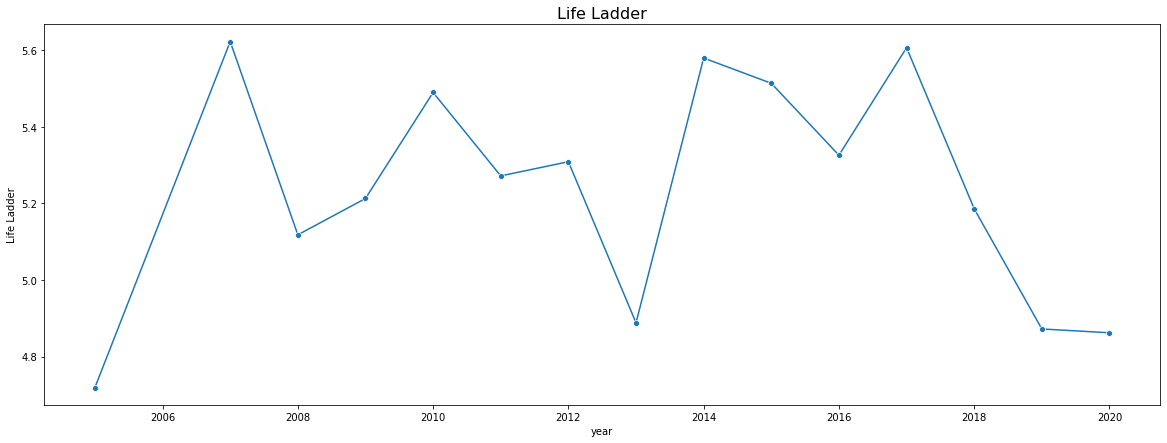

In [49]:
plt.figure(figsize=(20,7))
sns.lineplot(data=Turkey,x="year",y="Life Ladder",marker='o')
plt.title("Life Ladder",fontsize=16)
plt.show()

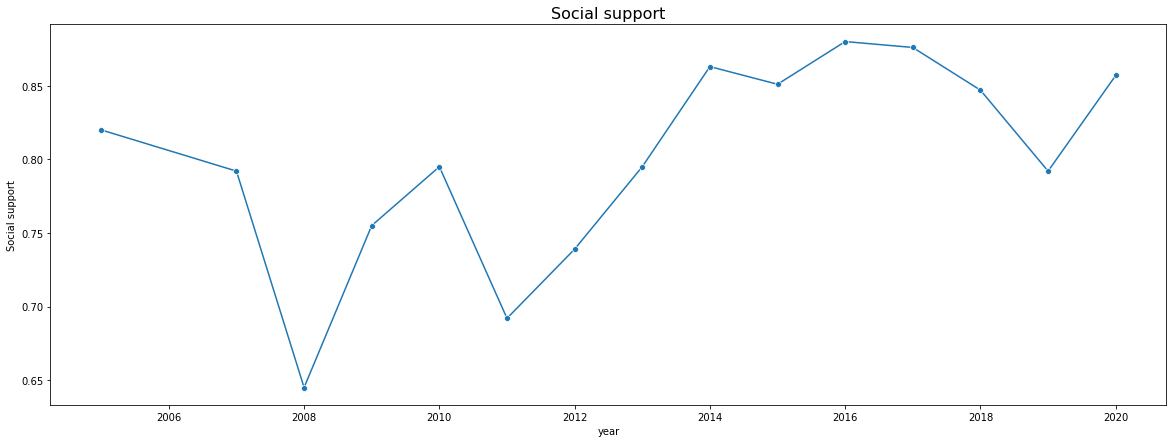

In [50]:
plt.figure(figsize=(20,7))
sns.lineplot(data=Turkey,x="year",y="Social support",marker='o')
plt.title("Social support",fontsize=16)
plt.show()

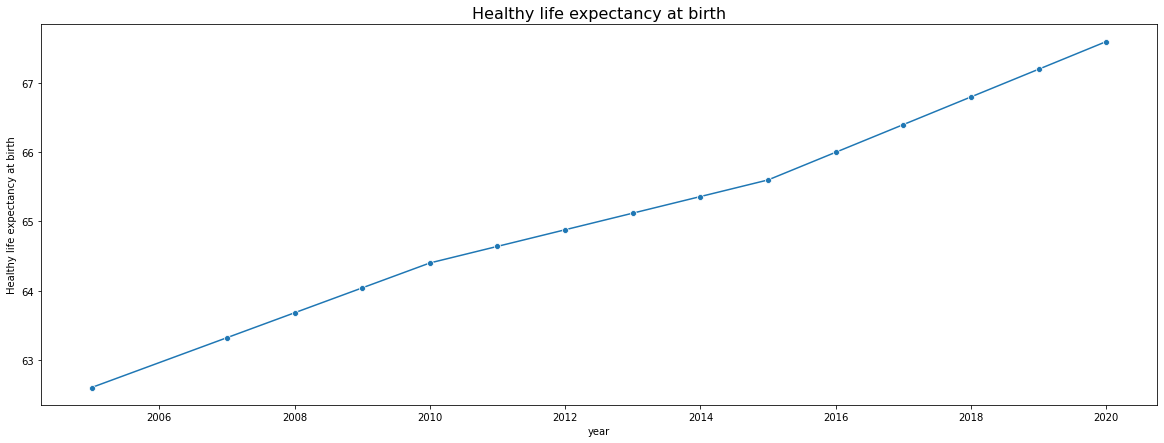

In [51]:
plt.figure(figsize=(20,7))
sns.lineplot(data=Turkey,x="year",y="Healthy life expectancy at birth",marker='o')
plt.title("Healthy life expectancy at birth",fontsize=16)  # doğumda sağlıklı yaşam beklentisi
plt.show()

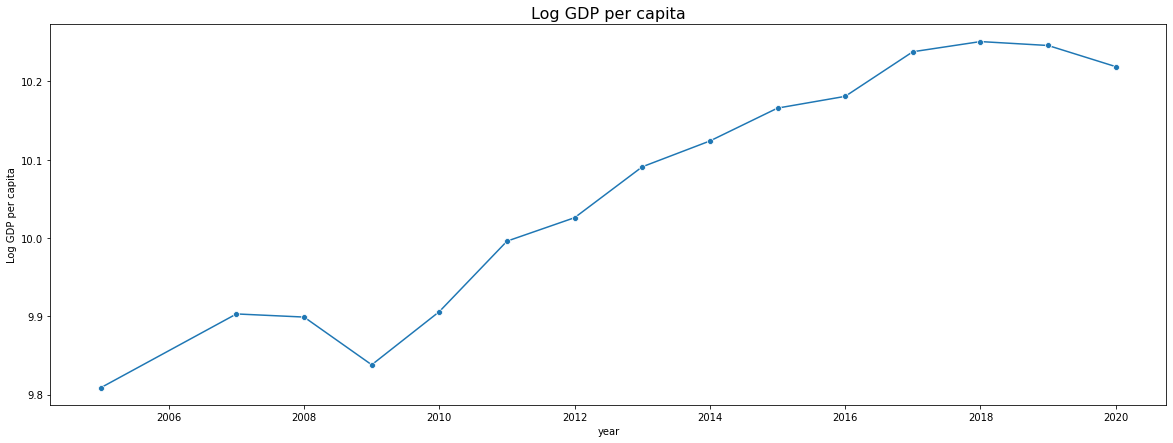

In [52]:
plt.figure(figsize=(20,7))
sns.lineplot(data=Turkey,x="year",y="Log GDP per capita",marker='o')
plt.title("Log GDP per capita",fontsize=16) # kişi başına düşen gelir
plt.show()